In [20]:
import pandas as pd 
import numpy as np
import xgboost as xgb 
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score, KFold
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt
from sklearn.model_selection import GridSearchCV

In [2]:
train = pd.read_csv("Data/power-data/save_data/train_process.csv")
test = pd.read_csv("Data/power-data/save_data/test_process.csv")
train = train.drop(['Unnamed: 0', 'atmospheric_temperature(°C)'], axis=1)
test = test.drop(['Unnamed: 0', 'atmospheric_temperature(°C)'], axis=1)

In [3]:
X = train.drop(['windmill_generated_power(kW/h)', ], axis=1).values
y = train['windmill_generated_power(kW/h)'].values

In [4]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [5]:
xgbr = xgb.XGBRegressor(verbosity=0)
xgbr.fit(X_train, y_train)

XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
             importance_type='gain', interaction_constraints='',
             learning_rate=0.300000012, max_delta_step=0, max_depth=6,
             min_child_weight=1, missing=nan, monotone_constraints='()',
             n_estimators=100, n_jobs=0, num_parallel_tree=1, random_state=0,
             reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
             tree_method='exact', validate_parameters=1, verbosity=0)

In [6]:
score = xgbr.score(X_train, y_train)
print("Training Score:", score)

Training Score: 0.9870684614236074


In [7]:
y_pred = xgbr.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
print("Mean Square Error Model:", mse)
print("Testing Score:", xgbr.score(X_test, y_test))
print("R^2 Score:", r2_score(y_test, y_pred))

Mean Square Error Model: 0.3118028712940171
Testing Score: 0.9559362070289726
R^2 Score: 0.9559362070289726


## Hyperparameter tuning using gridsearch

In [12]:
param_grid = {
       'learning_rate': [0.01, 0.1],
        'max_depth': [3, 5, 7, 10],
        'min_child_weight': [1, 3, 5],
        'subsample': [0.5, 0.7],
        'colsample_bytree': [0.5, 0.7],
        'n_estimators' : [100, 200, 500],
        'objective': ['reg:squarederror']
        }

In [16]:
#r2 = xgb.XGBRegressor(random_state= 11)
#grid_search2 = GridSearchCV(estimator = r2, param_grid = param_grid,cv = 3, n_jobs = -1)
#grid_search2.fit(X_train, y_train)

GridSearchCV(cv=3,
             estimator=XGBRegressor(base_score=None, booster=None,
                                    colsample_bylevel=None,
                                    colsample_bynode=None,
                                    colsample_bytree=None, gamma=None,
                                    gpu_id=None, importance_type='gain',
                                    interaction_constraints=None,
                                    learning_rate=None, max_delta_step=None,
                                    max_depth=None, min_child_weight=None,
                                    missing=nan, monotone_constraints=None,
                                    n_estimators=100, n_jobs=...
                                    num_parallel_tree=None, random_state=11,
                                    reg_alpha=None, reg_lambda=None,
                                    scale_pos_weight=None, subsample=None,
                                    tree_method=None, validate_paramete

In [17]:
#grid_search2.best_params_

{'colsample_bytree': 0.7,
 'learning_rate': 0.01,
 'max_depth': 10,
 'min_child_weight': 5,
 'n_estimators': 500,
 'objective': 'reg:squarederror',
 'subsample': 0.7}

In [ ]:
#{'colsample_bytree': 0.7,
 #'learning_rate': 0.01,
 #'max_depth': 10,
 #'min_child_weight': 5,
 #'n_estimators': 500,
 #'objective': 'reg:squarederror',
 #'subsample': 0.7}

In [12]:
xgb_hyper = xgb.XGBRegressor(colsample_bytree= 0.7,
 learning_rate= 0.01,
 max_depth= 10,
 min_child_weight= 5,
 n_estimators= 500,
  objective= 'reg:squarederror',
 subsample= 0.7)
xgb_hyper.fit(X_train, y_train)

XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=0.7, gamma=0, gpu_id=-1,
             importance_type='gain', interaction_constraints='',
             learning_rate=0.01, max_delta_step=0, max_depth=10,
             min_child_weight=5, missing=nan, monotone_constraints='()',
             n_estimators=500, n_jobs=0, num_parallel_tree=1, random_state=0,
             reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=0.7,
             tree_method='exact', validate_parameters=1, verbosity=None)

In [13]:
score = xgb_hyper.score(X_train, y_train)
print("Training Score:", score)

Training Score: 0.9861261820373233


In [24]:
y_pred_hyper = xgb_hyper.predict(X_test)
mse = mean_squared_error(y_test, y_pred_hyper)
print("Mean Square Error Model:", mse)
print("Testing Score:", xgb_hyper.score(X_test, y_test))

Mean Square Error Model: 0.26904895573282867
Testing Score: 0.9619781644880896


Điểm train thấp hơn nhưng điểm test lại cao hơn

In [21]:
xgb_1 = xgb.XGBRegressor(n_estimators=500,max_depth=5,booster='gbtree',n_jobs=-1,learning_rate=0.1,reg_lambda=0.01,reg_alpha=0.3)
xgb_1.fit(X_train, y_train)

XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
             importance_type='gain', interaction_constraints='',
             learning_rate=0.1, max_delta_step=0, max_depth=5,
             min_child_weight=1, missing=nan, monotone_constraints='()',
             n_estimators=500, n_jobs=-1, num_parallel_tree=1, random_state=0,
             reg_alpha=0.3, reg_lambda=0.01, scale_pos_weight=1, subsample=1,
             tree_method='exact', validate_parameters=1, verbosity=None)

In [22]:
score = xgb_1.score(X_train, y_train)
print("Training Score:", score)

Training Score: 0.9886162571761743


In [23]:
y_pred = xgb_1.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
print("Mean Square Error Model:", mse)
print("Testing Score:", xgb_1.score(X_test, y_test))

Mean Square Error Model: 0.27773326497215106
Testing Score: 0.9607509031648382


---> Tốt nhất vẫn là XGB đã hyperparameter

## Visualize Predict Result

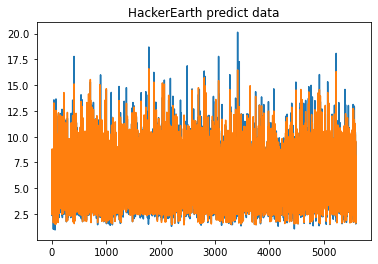

In [25]:
# visualize
ax = range(len(y_test))
plt.plot(ax, y_test, label='Dữ liệu ban đầu')
plt.plot(ax, y_pred_hyper, label='Dữ liệu dự đoán')
plt.title("HackerEarth predict data")
plt.show()

Predict testing dataset and demosubmit

In [26]:
train.shape

(27993, 21)

In [27]:
test.shape

(12086, 21)

In [28]:
test = test.drop(['windmill_generated_power(kW/h)'], axis=1).values

In [29]:
test_pred = xgb_hyper.predict(test)

In [30]:
test_pred

array([ 2.5398073,  2.4581523,  3.170714 , ...,  5.227888 ,  5.467039 ,
       10.437505 ], dtype=float32)

In [31]:
sub = pd.read_csv("Data/power-data/save_data/sub_pre.csv")
sub.head()

,Unnamed: 0,tracking_id,datetime
0,0,WM_19817,2019-04-17 08:53:20
1,1,WM_18723,2019-03-30 07:43:20
2,2,WM_34552,2019-08-10 11:33:20
3,3,WM_28570,2019-06-26 03:53:20
4,4,WM_36934,2019-08-27 16:43:20


In [32]:
sub = sub.drop(['Unnamed: 0'], axis=1)

In [33]:
sub["windmill_generated_power(kW/h)"] = test_pred

In [34]:
sub

,tracking_id,datetime,windmill_generated_power(kW/h)
0,WM_19817,2019-04-17 08:53:20,2.539807
1,WM_18723,2019-03-30 07:43:20,2.458152
2,WM_34552,2019-08-10 11:33:20,3.170714
3,WM_28570,2019-06-26 03:53:20,7.325660
4,WM_36934,2019-08-27 16:43:20,3.606497
...,...,...,...
12081,WM_13376,2019-02-12 11:33:20,6.670159
12082,WM_1630,2018-11-12 17:33:20,3.290549
12083,WM_24703,2019-05-27 11:53:20,5.227888
12084,WM_22893,2019-05-13 21:53:20,5.467039


In [35]:
#sub.to_csv("Data/power-data/save_data/submit_2.csv")